# Atividade 1

## Análise de Dados de Saúde com Modelos Descritivos e Explicativos

**Objetivo:** O objetivo deste projeto é realizar uma análise exploratória e descritiva de um conjunto de dados relacionados à saúde, utilizando a linguagem Python. As tarefas são: identificar padrões, tendências e possíveis associações entre as variáveis do dataset, aplicando modelos descritivos e explicativos.

**Descrição:** Você deve selecionar um conjunto de dados de saúde, como por exemplo, um dataset contendo informações de pacientes com doenças crônicas, como diabetes, hipertensão, ou doenças cardíacas. A análise deverá incluir:

1. **Leitura e Pré-processamento do Dataset:** Carregue o dataset, explore suas características básicas e realize o pré-processamento necessário (tratar valores ausentes, normalizar variáveis, etc.).

2. **Análise Descritiva:** Use estatísticas descritivas para entender a distribuição das variáveis do dataset, incluindo medidas de tendência central (média, mediana) e de dispersão (desvio padrão, quartis).
Visualização dos Dados: Crie gráficos para visualizar a distribuição dos dados e identificar padrões, como histogramas, boxplots e gráficos de dispersão.

3. **Modelos Explicativos:** Aplique modelos explicativos (como regressão linear, logística ou árvores de decisão) para entender a relação entre as variáveis do dataset.

4. **Verificação de Associações:** Realize testes estatísticos para verificar a existência de associações significativas entre variáveis, como o teste qui-quadrado para variáveis categóricas ou a correlação de Pearson para variáveis numéricas.

5. **Interpretação dos Resultados:** Interprete os resultados obtidos a partir das análises e modelos aplicados, discutindo a significância e as implicações das descobertas.


## 1- Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats

## 2- Dataset

Conjunto de dados de doenças cardíacas, obtido na Kaggle https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download.

## Leitura e pré-processamento do dataset

In [ ]:
# Carregar o dataset
df = "/content/heart.csv"
data = pd.read_csv(df)

# Exibir as primeiras linhas do dataset
data.head

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 3- Pré-processamento dos Dados

In [ ]:
# Base sem dados faltantes:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Transformando o tipo de dado das colunas categóricas
col_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
data[col_cat] = data[col_cat].astype('category')

## 4- Análise descritiva

               age     trestbps        chol      thalach      oldpeak
count  1025.000000  1025.000000  1025.00000  1025.000000  1025.000000
mean     54.434146   131.611707   246.00000   149.114146     1.071512
std       9.072290    17.516718    51.59251    23.005724     1.175053
min      29.000000    94.000000   126.00000    71.000000     0.000000
25%      48.000000   120.000000   211.00000   132.000000     0.000000
50%      56.000000   130.000000   240.00000   152.000000     0.800000
75%      61.000000   140.000000   275.00000   166.000000     1.800000
max      77.000000   200.000000   564.00000   202.000000     6.200000


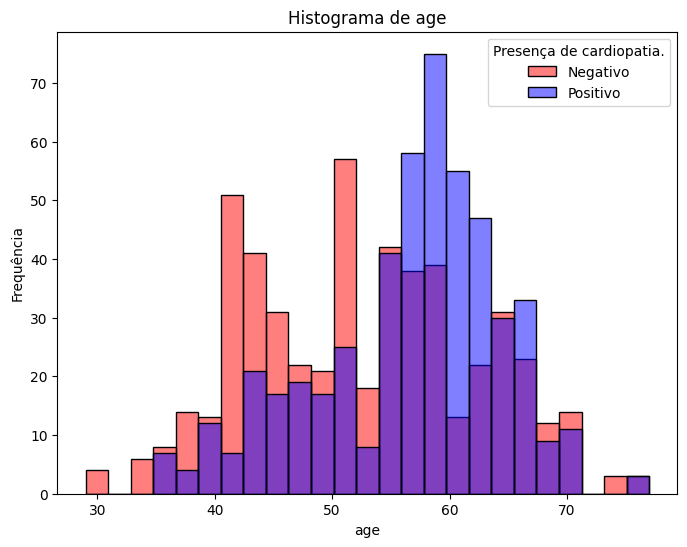

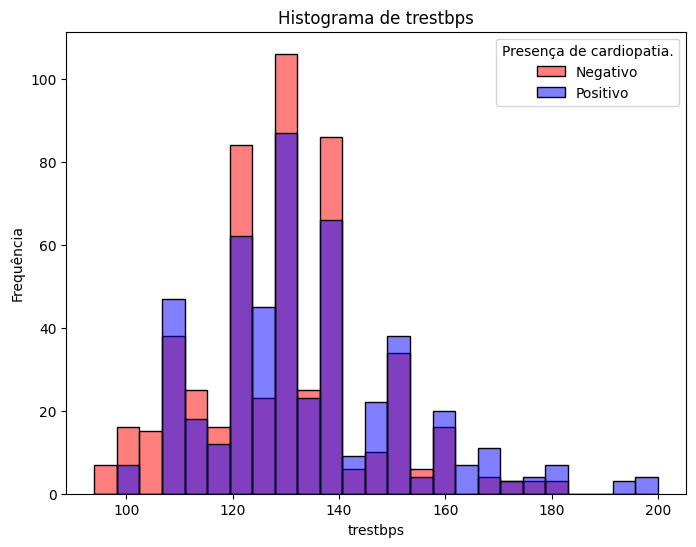

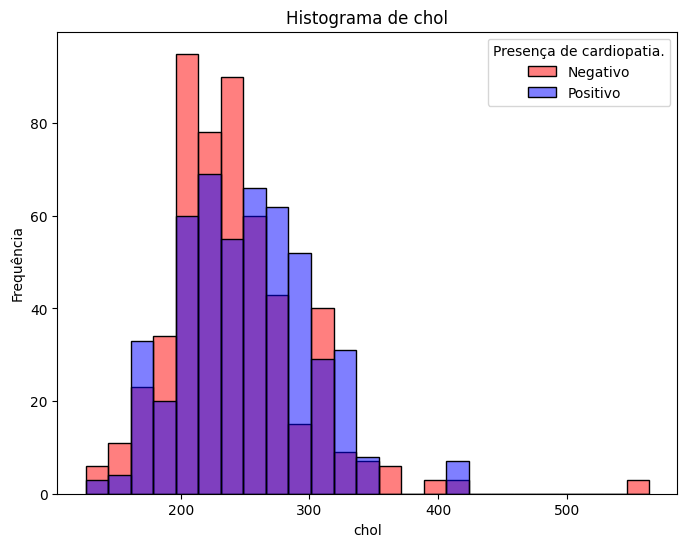

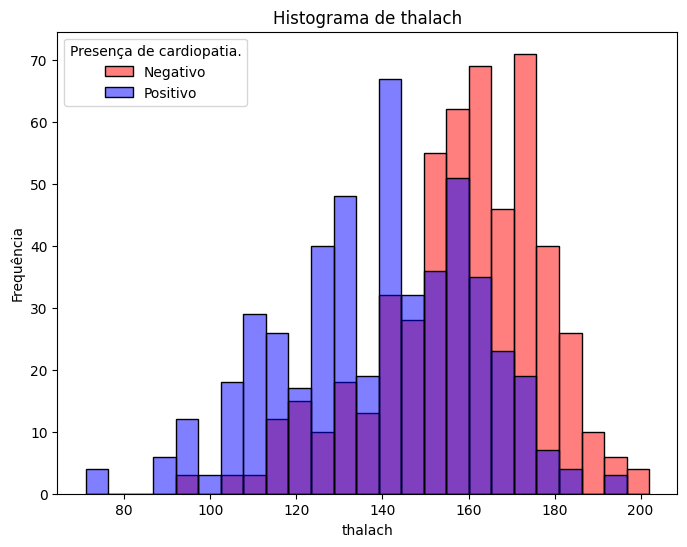

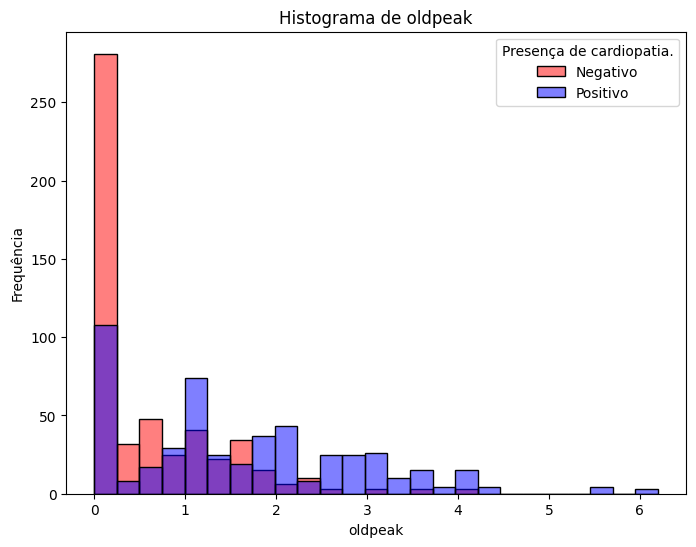

In [ ]:
# Resumo das estatísticas descritivas
print(data.describe())

# Iterar sobre as colunas de interesse
for column in data.columns:
    # Verificar se a coluna é do tipo numérico
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(8, 6))

        # Criar o histograma
        sns.histplot(data=data, x=column, hue='target', bins=25, palette={0: 'blue', 1: 'red'}, alpha=0.5, edgecolor='black')

        # Adicionar título e rótulos
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frequência')
        plt.legend(title='Presença de cardiopatia.', labels=['Negativo', 'Positivo'])

        # Mostrar o gráfico
        plt.show()

## 6- Gráfico de Dispersão

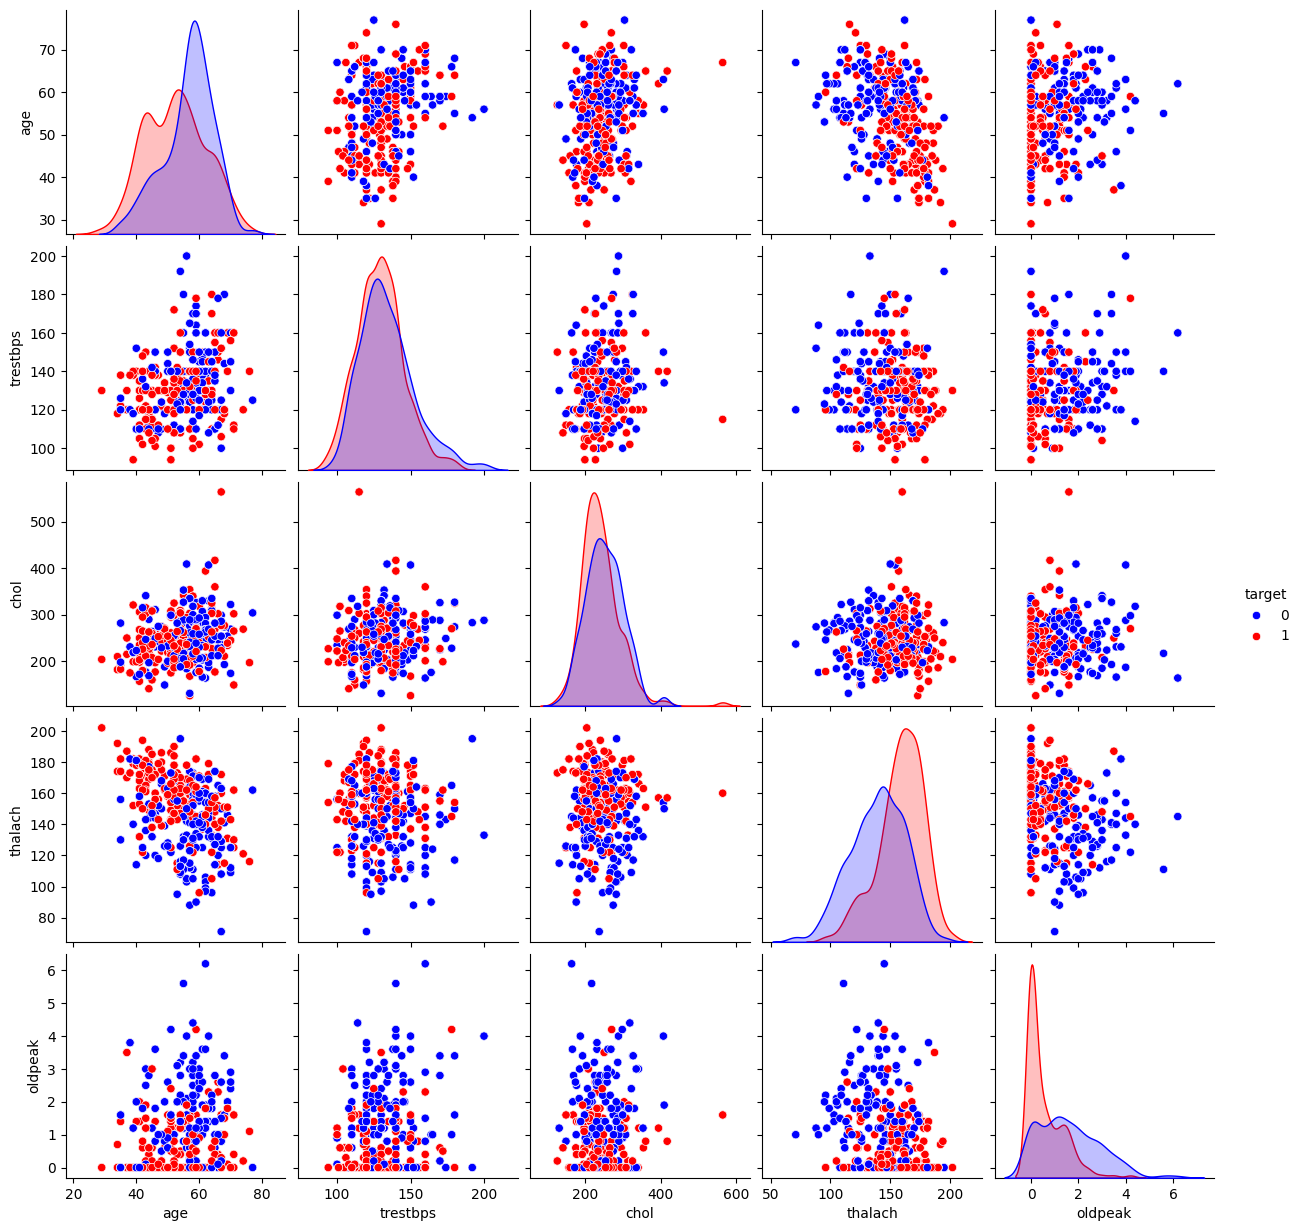

In [ ]:
# Gráfico de dispersão de todas as variáveis
sns.pairplot(data, hue='target', palette={0: 'blue', 1: 'red'})
plt.show()

## 7- Modelo explicativo (regressão logística)

In [ ]:
# Preparando os dados para o modelo de classificação
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Ajustar o modelo de regressão logística
model = LogisticRegression()
model.fit(X, y)

# Resumo dos coeficientes
coef = pd.DataFrame(model.coef_, columns=X.columns)
coef['Intercept'] = model.intercept_
print('Coeficientes:')
print(coef, '\n')

# Odds Ratio
odds_ratios = np.exp(model.coef_[0])
print('Odds Ratios:')
for feature, ratio in zip(X.columns, odds_ratios):
    print(f' {feature}: {ratio:.4f}')

Coeficientes:
       age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.00981 -1.541083  0.858302 -0.013915 -0.004099 -0.188785  0.559875   

    thalach     exang   oldpeak     slope        ca      thal  Intercept  
0  0.031358 -0.868141 -0.526618  0.536495 -0.715423 -0.850328   0.078219   

Odds Ratios:
 age: 1.0099
 sex: 0.2141
 cp: 2.3592
 trestbps: 0.9862
 chol: 0.9959
 fbs: 0.8280
 restecg: 1.7505
 thalach: 1.0319
 exang: 0.4197
 oldpeak: 0.5906
 slope: 1.7100
 ca: 0.4890
 thal: 0.4273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8- Teste de correlação

In [ ]:
# Calcular a correlação de Pearson
colunas = [coluna for coluna in data.columns if pd.api.types.is_numeric_dtype(data[coluna])]
print(colunas)
for coluna1 in colunas:
  for coluna in colunas:
    if coluna1 != coluna:
      correlation, p_value = stats.pearsonr(data[coluna], data[coluna1])
      print(f'Coeficiente de Correlação entre {coluna} e {coluna1}:\n{correlation:.4f}, p-valor: {p_value:.4f}')
      if p_value > 0.05:
        print(f'Não há correlação significativa entre a variável {coluna} e {coluna1}.\n')
      else:
        print(f'Há evidências de correlação entre a variável {coluna} e {coluna1}.\n')

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Coeficiente de Correlação entre trestbps e age:
0.2711, p-valor: 0.0000
Há evidências de correlação entre a variável trestbps e age.

Coeficiente de Correlação entre chol e age:
0.2198, p-valor: 0.0000
Há evidências de correlação entre a variável chol e age.

Coeficiente de Correlação entre thalach e age:
-0.3902, p-valor: 0.0000
Há evidências de correlação entre a variável thalach e age.

Coeficiente de Correlação entre oldpeak e age:
0.2081, p-valor: 0.0000
Há evidências de correlação entre a variável oldpeak e age.

Coeficiente de Correlação entre age e trestbps:
0.2711, p-valor: 0.0000
Há evidências de correlação entre a variável age e trestbps.

Coeficiente de Correlação entre chol e trestbps:
0.1280, p-valor: 0.0000
Há evidências de correlação entre a variável chol e trestbps.

Coeficiente de Correlação entre thalach e trestbps:
-0.0393, p-valor: 0.2091
Não há correlação significativa entre a variável thalach e trestbps.

Coeficie

Text(0.5, 1.0, 'Matriz de Correlação de Pearson')

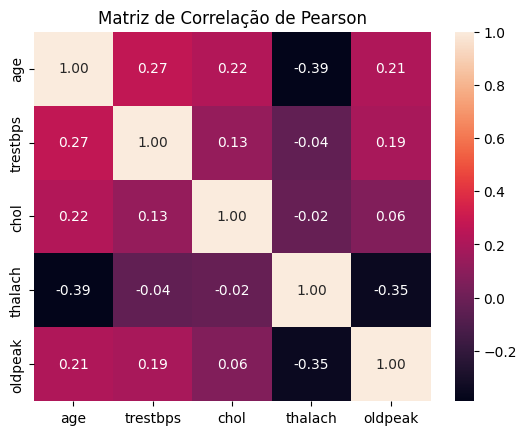

In [ ]:
# Também podemos observar diretamente por meio da matriz de correlação de pearson:
correlacao = data[colunas].corr()
sns.heatmap(correlacao, annot=True, fmt=".2f")
plt.title('Matriz de Correlação de Pearson')

## 9- Teste de Associação entre as variáveis categóricas e a Presença de cardiopatia usando Chi-quadrado

In [ ]:
var_cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for coluna in var_cat:
  contingency_table = pd.crosstab(data[coluna], data['target'])
  chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)
  print(f'Teste Chi-quadrado entre a variável {coluna} e a precença de cardiopatia:\n{chi2_stat:.4f}, p-valor: {p_val:.4f}')
  if p_val > 0.05:
    print(f'Não há associação significativa entre a variável {coluna} e a presença de cardiopatia.\n')
  else:
    print(f'Há evidências de associação entre a variável {coluna} e a presença de cardiopatia.\n')

Teste Chi-quadrado entre a variável sex e a precença de cardiopatia:
78.8631, p-valor: 0.0000
Há evidências de associação entre a variável sex e a presença de cardiopatia.

Teste Chi-quadrado entre a variável cp e a precença de cardiopatia:
280.9822, p-valor: 0.0000
Há evidências de associação entre a variável cp e a presença de cardiopatia.

Teste Chi-quadrado entre a variável fbs e a precença de cardiopatia:
1.5134, p-valor: 0.2186
Não há associação significativa entre a variável fbs e a presença de cardiopatia.

Teste Chi-quadrado entre a variável restecg e a precença de cardiopatia:
35.7843, p-valor: 0.0000
Há evidências de associação entre a variável restecg e a presença de cardiopatia.

Teste Chi-quadrado entre a variável exang e a precença de cardiopatia:
194.8155, p-valor: 0.0000
Há evidências de associação entre a variável exang e a presença de cardiopatia.

Teste Chi-quadrado entre a variável slope e a precença de cardiopatia:
155.8729, p-valor: 0.0000
Há evidências de associ

# 10- Interpretando os resultados

Diretamente dos dados podemos concluir que não temos evidências de associação entre os níveis de açucar em sangue (fbs) e a presença de cardiopatia. Além disso, segundo o teste de pearson, as variáveis numéricas apresentam correlação estatisticamente significativas entre elas, salvo a variável de frequência cardíaca máxima registrada (thelach) com o nível de colesterol (chol) e a pressão arterial (trestbps).

Por outro lado, segundo o modelo da regressão logística, por registar a taxa de chance (**odd_radio**) próximo do valor 1, as variáveis idade, pressão arterial, níveis de colesterol e frequência cardíaca máxima não altera as chances de precença de cardiopatia nos pacientes. Com relação às variáveis com **odd_ratio** superior  a 1 (por exemplo, tipo de dor torácica) aumentam a chance de precença de cardiopatia. Para as outras variáveis (com **odd_radio < 1**) as chances de cardiopatia diminuem.